In [1]:
from keras.layers import LSTM, Dense, Reshape, Conv2D, MaxPooling2D, Flatten, Bidirectional
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

In [3]:
pos = pd.read_table('dataset/trai.txt', names = ['x'])
neg = pd.read_table('dataset/neg.txt.txt', names = ['x'])
neg['y'] = 0
pos['y'] = 1
data = pos['x']
data = data.append(neg['x'])
y = pos['y']
y = y.append(neg['y'])

In [4]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Input, TimeDistributed, Conv1D, MaxPool1D, Activation
from keras.models import Model

In [5]:
words = pd.read_table('dataset/words.txt', names = ['x'])
words = words.astype(str)

In [7]:
tok = Tokenizer()
tok.fit_on_texts(words['x'])
seq  = tok.texts_to_sequences(data)
padded = pad_sequences(seq)

In [14]:
xx  =padded / v

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.82515834e-02,   1.98119520e-03,   4.52814219e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.24598501e-04,   1.61119872e-02,   6.11494242e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          8.76406991e-03,   7.18554437e-01,   6.00287959e-01],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.22335257e-01,   2.18688014e-02,   2.18688014e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.73862881e-02,   2.61243519e-03,   1.51544883e-03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.41851685e-04,   2.52968838e-04,   6.58695390e-01]])

In [11]:
yy = to_categorical(y, num_classes=2)


In [ ]:
xz = xx.reshape((25000, 2399, 1))

In [61]:
a = np.array(list(zip(xz, yy)))
np.random.shuffle(a)
xx1, yy1 = a.T

In [62]:

yy1

array([array([ 0.,  1.]), array([ 0.,  1.]), array([ 1.,  0.]), ...,
       array([ 1.,  0.]), array([ 1.,  0.]), array([ 0.,  1.])], dtype=object)

In [7]:
import math

In [83]:

clusters = []
max_len = 100
for i in seq:
    i = np.array(i)
    l = math.ceil(len(i) / max_len)
    padded = pad_sequences([i], l * max_len, padding="post")[0]
    padded = padded.reshape((-1, max_len))
    clusters.append(padded)
clusters = np.array(clusters)
clusters
all_y = to_categorical(y, num_classes=2)

In [9]:
v = len(tok.word_index)

In [84]:
m = Sequential()  
m.add(LSTM( 128, return_sequences=True, input_shape=(None, max_len))) 
m.add(LSTM( 128, return_sequences=False, input_shape=(None, max_len), activation='sigmoid'))

m.add(Dense(2))
m.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
m.summary()

model= m

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, None, 128)         117248    
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 258       
Total params: 249,090
Trainable params: 249,090
Non-trainable params: 0
_________________________________________________________________


In [103]:
2500 /2

1250.0

In [33]:
model = Sequential()  

model.add(LSTM(input_shape = (None, 1), units = 128, return_sequences = True, dropout = 0.2))
model.add(LSTM(input_shape = (None, 1), units = 128, return_sequences = True, dropout = 0.2))
model.add(LSTM(input_shape = (None, 1), units = 128, return_sequences = True, dropout = 0.2))
model.add(LSTM(input_shape = (None, 1), units = 128, return_sequences = False, dropout = 0.2))

model.add(Dense(units=2))
model.add(Activation("sigmoid"))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, None, 128)         66560     
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 128)         131584    
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 461,570
Trainable params: 461,570
Non-trainable params: 0
_________________________________________________________________


In [ ]:
[ [i[0]] for i in list(xx1[0])]
# [ [*i] for i in list(yy1[:1])]
# [*yy1[0]]

px, py = [], []
for x, y in zip(xx1, yy1):
    x = [[i[0]] for i in list(x)]
    y = [ *y]
    px.append(x)
    py.append(y)
px, py

In [48]:

model.fit(xx1, yy1, batch_size=10, epochs = 10, verbose = 1)

ValueError: Error when checking input: expected lstm_8_input to have 3 dimensions, but got array with shape (25000, 1)

In [64]:
def prepare(clusters, all_y):
#     all_data = np.array(list(zip(clusters, all_y)))
#     np.random.shuffle(all_data)
#     r_x, r_y = all_data.T

    px, py = [], []
    for x, y in zip(clusters, all_y):
        x = np.array([*x])
        print(y)
        y = np.array([*y])
        px.append(x)
        py.append(y)
    return px, py


In [63]:
from IPython.display import clear_output


In [89]:
reps = 10
num_epochs = 250

for _ in range(reps):
    clear_output()
    tx, ty = prepare(clusters, all_y)
    for i in range(num_epochs):
        n = 100
        lc, ac  = 0, 0
        for _x, _y in zip(tx[i*n:(i + 1) * n], ty[i*n:(i + 1) * n]):
            l, a = model.evaluate(_x, _y, verbose=0)
            model.fit(_x, _y, verbose=0, epochs=5)
            if l > a:
                lc += 1
            else:
                ac += 1
            print('Iter : {:10d} accuracy : {:.6f} loss : {:.6f}'.format(ac + lc, a, l), end = '\r')
        acc = ac / (ac + lc)
        print('epoch : {:10d} accuracy : {:.6f} loss : {:.6f}'.format(i, acc, 1 - acc))
        if i % 10 == 0:
            model.save_weights('new_model.hdf')
#     if i % 3 == 0:
#         tx, ty = prepare(clusters, all_y)
   
        
    

epoch :          0 accuracy : 0.460000 loss : 0.540000
epoch :          1 accuracy : 0.530000 loss : 0.470000
epoch :          2 accuracy : 0.550000 loss : 0.450000
epoch :          3 accuracy : 0.480000 loss : 0.520000
epoch :          4 accuracy : 0.490000 loss : 0.510000
epoch :          5 accuracy : 0.460000 loss : 0.540000
epoch :          6 accuracy : 0.520000 loss : 0.480000
epoch :          7 accuracy : 0.440000 loss : 0.560000
epoch :          8 accuracy : 0.510000 loss : 0.490000
epoch :          9 accuracy : 0.600000 loss : 0.400000
epoch :         10 accuracy : 0.610000 loss : 0.390000
epoch :         11 accuracy : 0.560000 loss : 0.440000
epoch :         12 accuracy : 0.520000 loss : 0.480000
epoch :         13 accuracy : 0.420000 loss : 0.580000
epoch :         14 accuracy : 0.480000 loss : 0.520000
epoch :         15 accuracy : 0.520000 loss : 0.480000
epoch :         16 accuracy : 0.440000 loss : 0.560000


KeyboardInterrupt: 

In [106]:
tx, ty = prepare(clusters, all_y)

In [53]:
m = Sequential()  
m.add(LSTM( 324, return_sequences=True, input_shape=(None, max_len))) 
m.add(LSTM( 324, return_sequences=False, input_shape=(None, max_len), activation='sigmoid')) 
m.add(Reshape((-1, 18, 1), input_shape = (1, 324)))
m.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
m.summary()

m1 = Sequential()
m1.add(m)
m1.add(Conv2D(filters = 3, kernel_size= 3, activation='tanh'))
m1.add(Flatten())
m1.add(Dense(192))
m1.add(Dense(2))
m1.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
m1.summary()

model= m1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 18, 18, 1)         1281744   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 3)         30        
_________________________________________________________________
flatten_4 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 192)               147648    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 386       
Total params: 1,429,808
Trainable params: 1,429,808
Non-trainable params: 0
_________________________________________________________________


In [44]:
import matplotlib.pyplot as plt


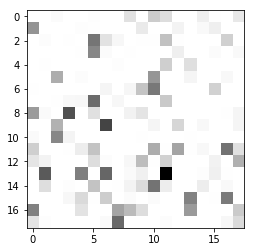

In [49]:
plt.imshow(m.predict(tx[200])[0].reshape(-1, 18), cmap='Greys')
plt.show()

In [111]:
model.predict(paddded[2])

ValueError: Error when checking : expected conv1d_5_input to have 3 dimensions, but got array with shape (5000, 1)